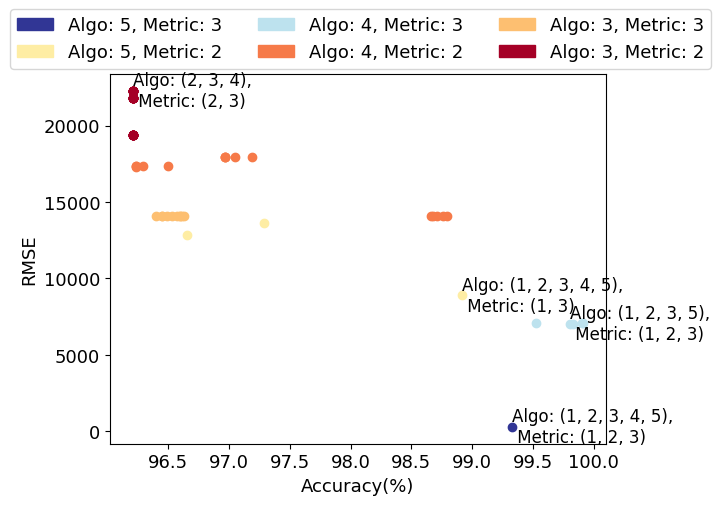

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations
import matplotlib.patches as mpatches

df_10app = pd.read_csv('./sen/10app_1_result.csv', index_col=0)
plt.rcParams.update({'font.size': 13})

algos = [1,2,3,4,5]
metrics = [1,2,3]
algos_comb = list(combinations(algos, 5))+list(combinations(algos, 4))+list(combinations(algos, 3))
metrics_comb = list(combinations(metrics, 3)) + list(combinations(metrics, 2))
color_dict = {}
patches = []
for i in algos_comb:
    for j in metrics_comb:
        data_point = eval(df_10app[str(i)][str(j)])
        color = color_dict.get((len(i), len(j)))
        if color is None:
            labelcolor = (len(i) * len(j) - 6) / 9
            color = plt.cm.RdYlBu(labelcolor)
            color_dict[(len(i), len(j))] = color
            patches.append(mpatches.Patch(color=color, label=f'Algo: {len(i)}, Metric: {len(j)}'))
        plt.scatter(data_point['accu'], data_point['RMSE'], color=color)
        # if (i, j) in [((1,2,3,4,5),(1,2,3)),((1,3,4,5),(1,2,3)),((1,3,4),(2,3)),((1,2,4,5),(1,2,3))]: # 1app
        # if (i, j) in [((1,2,3,4,5),(1,2,3)),((1,3,4,5),(1,2,3)),((1,3,4),(2,3)),((1,2,3,5),(1,2,3))]: # 10app_2
        # if (i, j) in [((1,2,3,4,5),(1,2,3)),((1,3,4,5),(1,2,3)),((2,3,4),(2,3)),((1,2,3,5),(1,2,3))]: # 30app
        if (i, j) in [((1,2,3,4,5),(1,2,3)),((1,2,3,4,5),(1,3)),((2,3,4),(2,3)),((1,2,3,5),(1,2,3))]: # 10app_1
            plt.text(data_point['accu'], data_point['RMSE'], f'Algo: {str(i)},\n Metric: {str(j)}', fontdict={'size': 12}, va='center')
        # plt.text(data_point['accu'], data_point['RMSE'], f'Algo: {str(i)}, Metric: {str(j)}')
plt.xlabel('Accuracy(%)')
plt.ylabel('RMSE')
ax=plt.gca()
ax.legend(handles=patches, bbox_to_anchor=(1.23,1.2), ncol=3)

plt.savefig('out/sen/10app_1_sen.pdf', bbox_inches = 'tight')
